# Customer Churn Analysis

##### Dataset Info: Sample Data Set containing customer data and showing customers left last month

In [1]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

##### Load the data file

In [2]:
df = pd.read_csv("C:/Users/Administrator/Documents/CustomerChurn.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##### Check the various attributes of data like shape(rows and cols), Columns, datatypes

In [5]:
df.shape

(7043, 21)

In [6]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [7]:
# Checking the data types of all the columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
# Check the descriptive statistics of numeric variables
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


- SenirorCitizen is actually a categorical variable hence the 25%-50%-75% distribution is not proper
- 75% customers have tenure less than 55 months
- Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

In [9]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [10]:
df['Churn'].value_counts()/len(df)*100

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

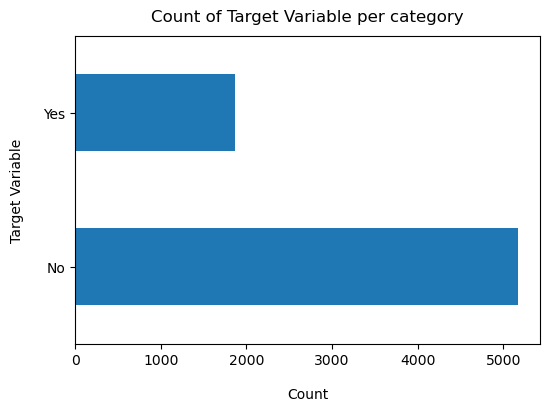

In [11]:
df['Churn'].value_counts().plot(kind='barh', figsize=(6,4))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of Target Variable per category", y=1.02);

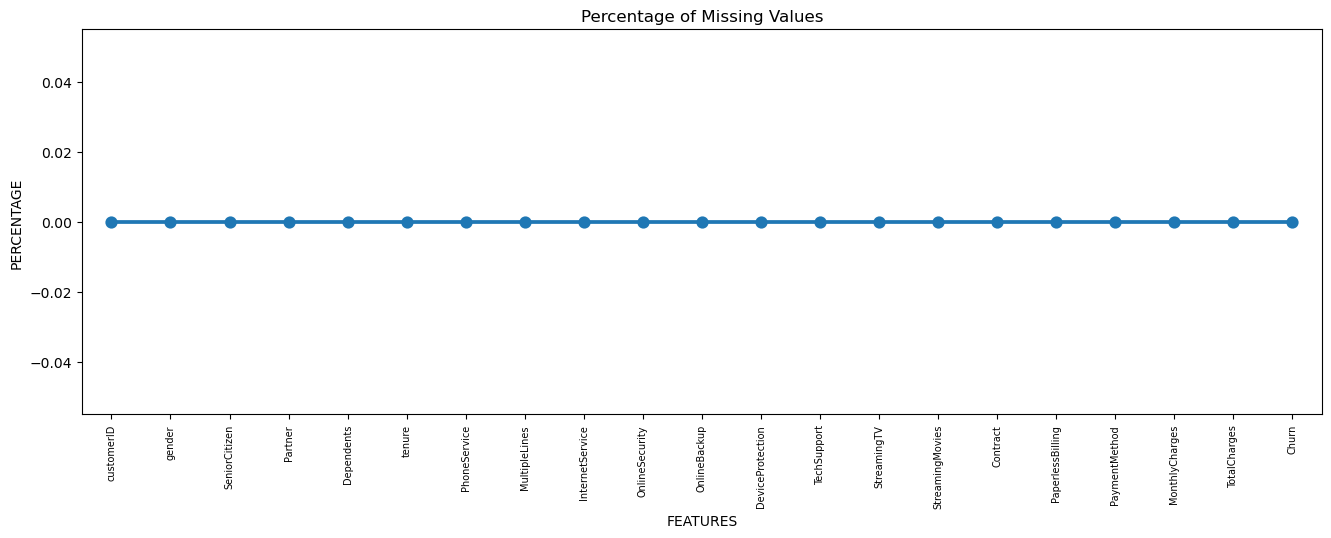

In [12]:
# Calculate missing percentages
missing = pd.DataFrame((df.isnull().sum()) * 100 / df.shape[0]).reset_index()
missing.columns = ['feature', 'percentage']

# Plot
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='feature', y='percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("PERCENTAGE")
plt.xlabel("FEATURES")
plt.show()

#### Missing Data - Initial Intuition

- Here, we don't have any missing data.

General Thumb Rules:
- For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
- For features with very high number of missing values- it is better tpo drop those columns as they give very less insight on analysis.
- As there's no thumb rule on what criteria do we delete the column with high number of missing values, but generally you can delete the columns, if you have more than 30%-40% of missing values. But again ther's a catch here, for example, Is_Car & Car_Type, People having no cars, will obviously have Car_Type as NaN (null), but that doesn't make this column useless, so decisions has to be taken wisely.

### Data Cleaning

1. Create a copy of base data for manipulation & processing

In [13]:
new_df = df.copy()

2. Total Charges should be numeric amount. Let's convert it to numerical data type

In [14]:
new_df.TotalCharges = pd.to_numeric(new_df.TotalCharges, errors='coerce')
new_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


3. As we can see there are 11 missing values in TotalCharges column. Let's check these records

In [16]:
new_df.loc[new_df['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


4. Missing Value Treatment

Since the % of these records compared to total dataset is very low i.e., 0.15%, it is safe to ignore them from further processing.

In [17]:
#Removing missing values
new_df.dropna(how = 'any', inplace = True)

5. Divide customers into bins based on tenure e.g., for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 yrs, tenure group of 13-24; so on..

In [18]:
# Get the max tenure
print(new_df['tenure'].max())

72


In [19]:
labels = ["{0} - {1}".format(i, i+11) for i in range(1,72,12)]
print(labels)

['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72']


In [20]:
#Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i+11) for i in range(1,72,12)]

new_df['tenure_group'] = pd.cut(new_df.tenure, range(1, 80, 12), right=False, labels=labels)

In [21]:
new_df['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

6. Remove columns not required for processing

Here we are removing customerID and tenure-
- CustomerID: It will not give any information, it's a randomly generated number.
- Tenure: We have already created a tenure_group thats why we don't need tenure.

In [22]:
#drop column CustomerID and tenure
new_df.drop(columns=['customerID','tenure'], axis=1, inplace=True)

In [23]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


## Data Exploration

1. Plot distribution of individual predictors by churn


### Univariate Analysis

In [24]:
new_df.head(5)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


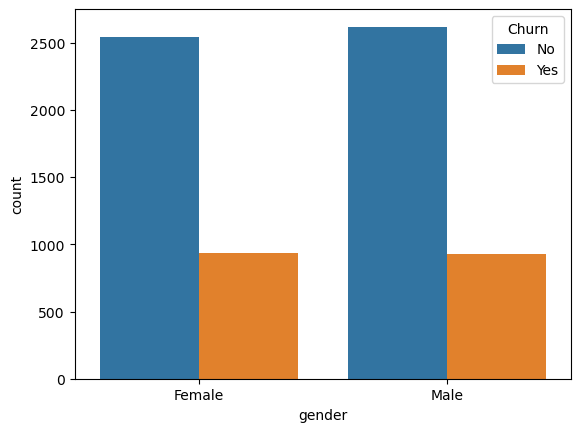

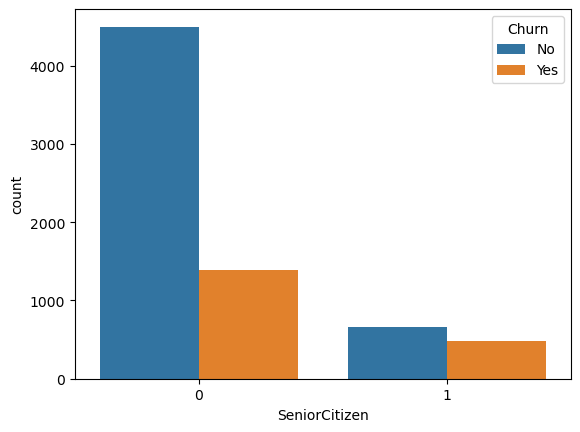

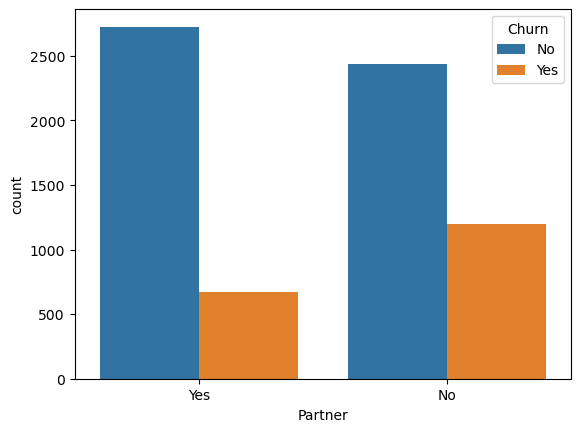

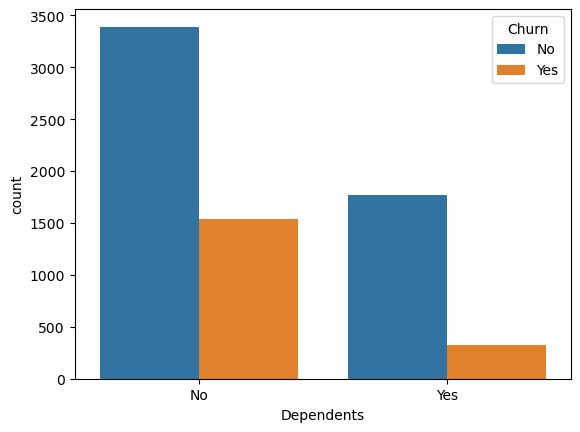

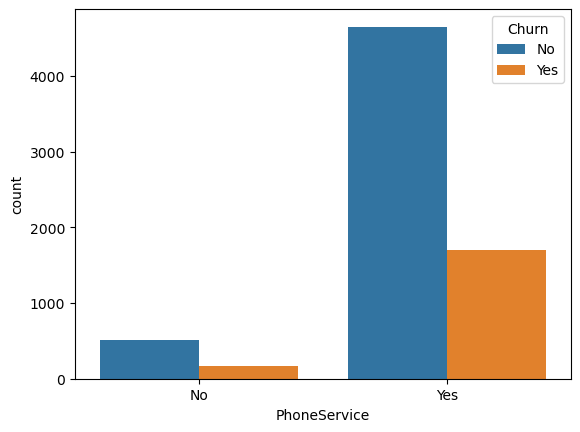

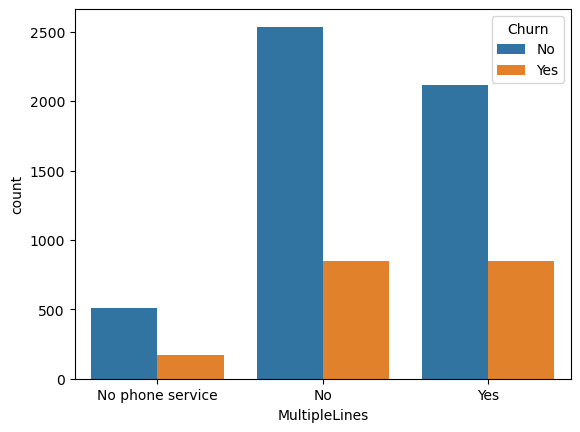

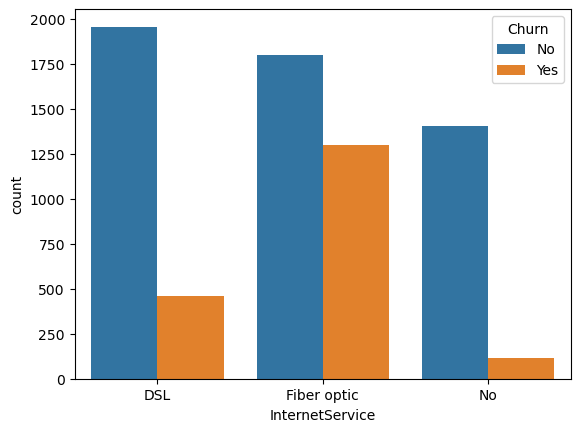

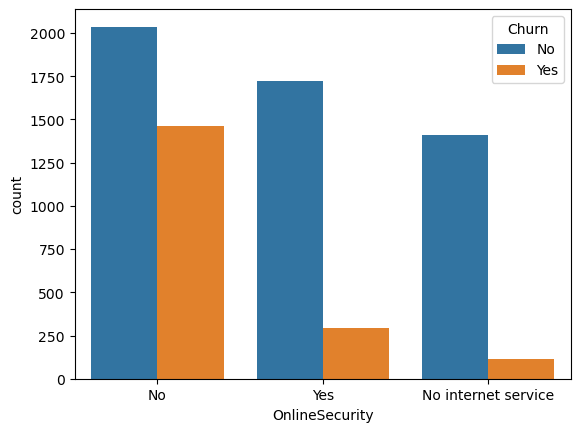

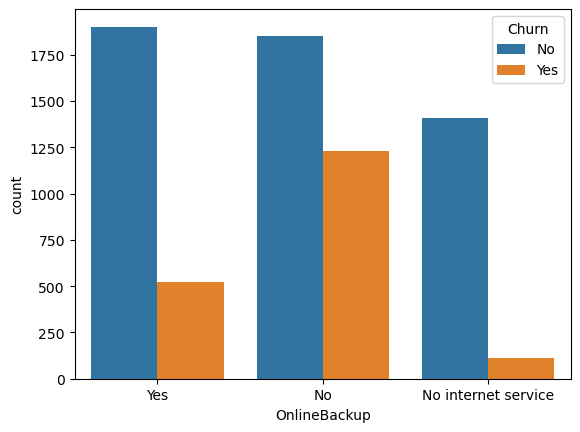

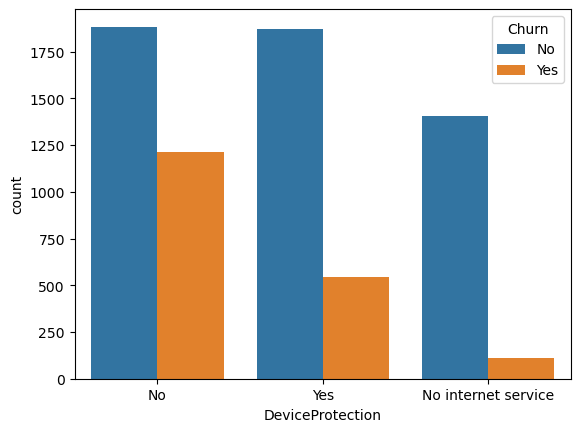

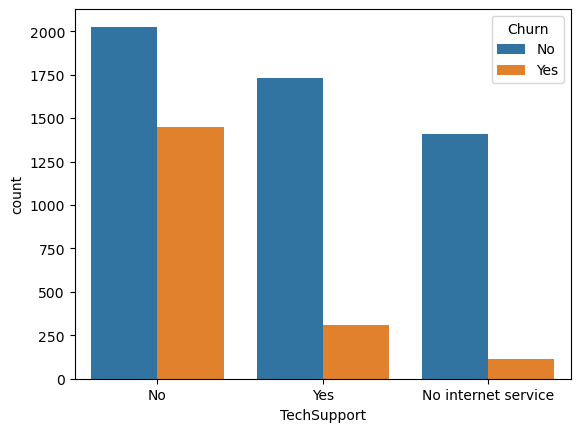

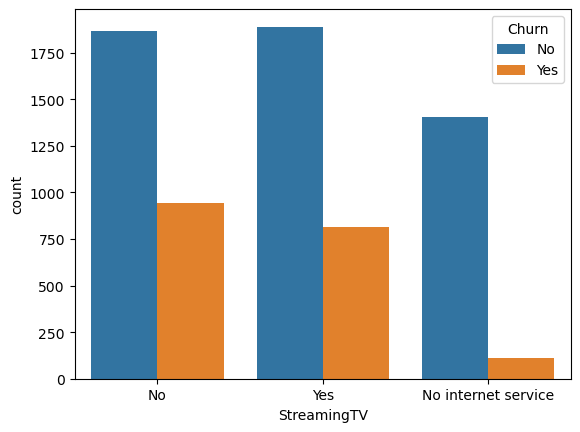

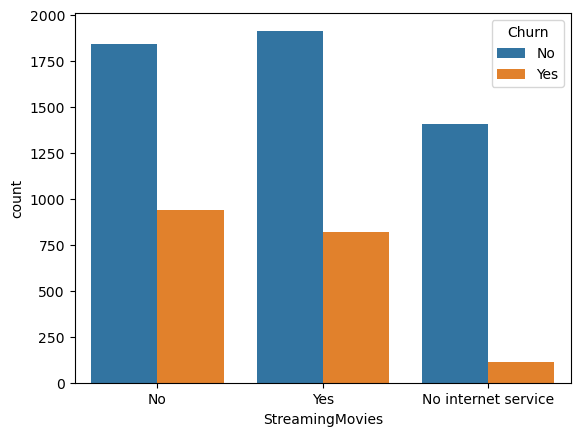

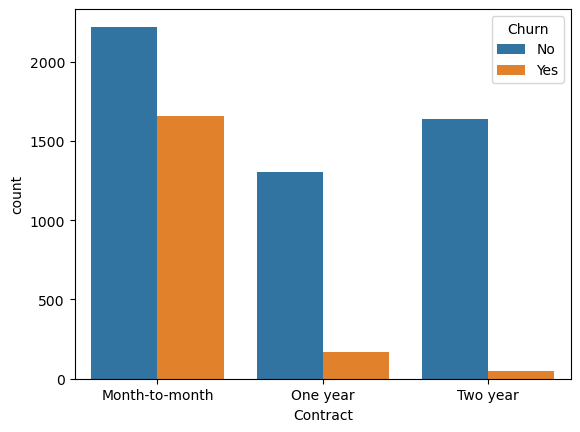

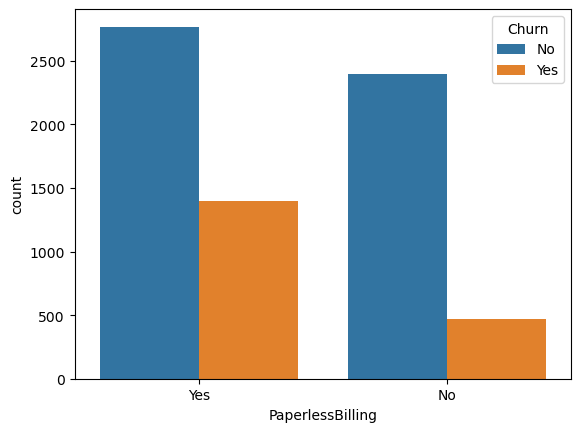

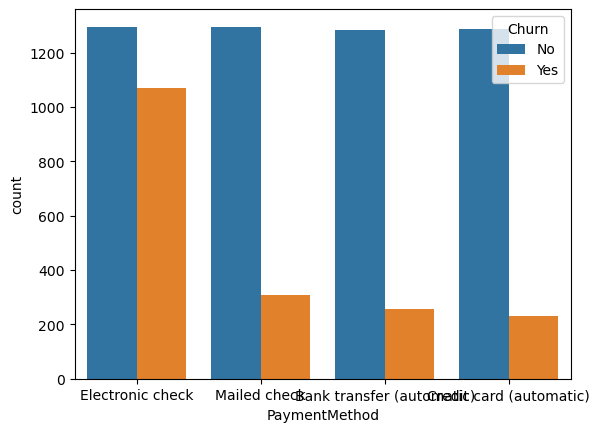

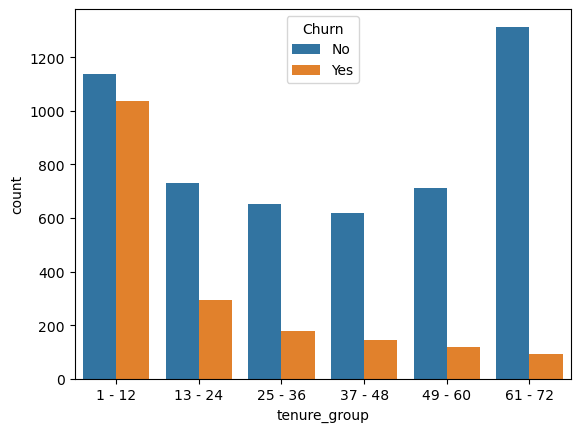

In [25]:
for i, predictor in enumerate(new_df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=new_df, x=predictor,hue='Churn')

##### Churners insight with threshold correlation value = 0.2
1. Senior citizen are more likely to churn
2. People with no partner are more likely to churn
3. Monthly contracts are more likely to churn because they are free customers
4. People who pay via Electronic check are more likely to churn (Female who are paying through credit card are more likely to churn)
5. Monthly charges and Total charges are positively correlated
6. Churn is high when monthly charges are high
7. People who don't have online security are high Churners
8. People who don't have Tech support are high Churners
9. People who are new customers i.e., between 1- 12 months are high churners
10. People with Internet services like Fibre optics are more likely to churn
11. Payment method electronic check are more likely to churn

##### Non-Churners insight with threshold correlation value = -0.2
1. People with contract of 2 years are less likely to churn
2. People with Device protection-no internet service are less likely to churn
3. People with streaming movie-no internet service are less likely to churn
4. People with Tech support-no internet are less likely to churn
5. People with online backup - no internet are less likely to churn
6. People with online security no internet are less likely to churn
7. People with tenure group 61-72 are low churners that means people are there for longer period of time are low churners

## Numerical Analysis

In [26]:
new_df.gender.value_counts()

gender
Male      3549
Female    3483
Name: count, dtype: int64

In [27]:
new_df1_target0=new_df[new_df["Churn"]=='No']
new_df1_target1=new_df[new_df["Churn"]=='Yes']

In [28]:
new_df1_target1.gender.value_counts()

gender
Female    939
Male      930
Name: count, dtype: int64

In [29]:
pd.crosstab(new_df.PaymentMethod, new_df.Churn)

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


2. Convert the target variable 'Churn' in a binary numeric variable i.e., Yes=1; No=0 bcz we will correlation things

In [30]:
new_df['Churn']= np.where(new_df.Churn =='Yes',1,0)

In [31]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


3. Convert all the categorical variables into dummy variables

In [32]:
new_df_dummies = pd.get_dummies(new_df)
new_df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


4. Relationship between Monthly Charges and Total Charges

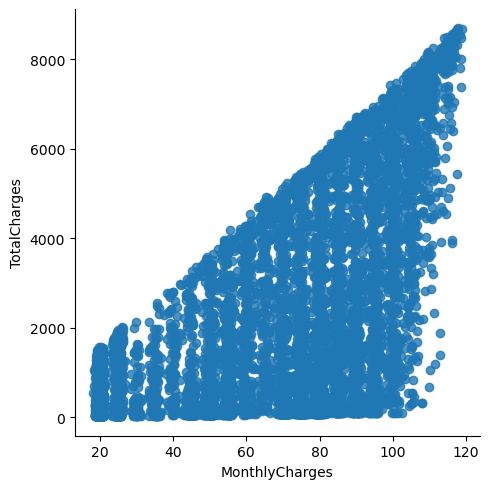

In [33]:
sns.lmplot(data=new_df_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

In [34]:
## Calculating correlation between Monthly Charges and Total Charges
new_df_dummies['MonthlyCharges'].corr(new_df_dummies['TotalCharges'])

0.6510648032262024

Total Charges increase as Monthly Charges increase - as expected

Monthly charges and Total charges are positively correlated

5. Churn by Monthly Charges and Total Charges

Text(0.5, 1.0, 'Monthly charges by churn')

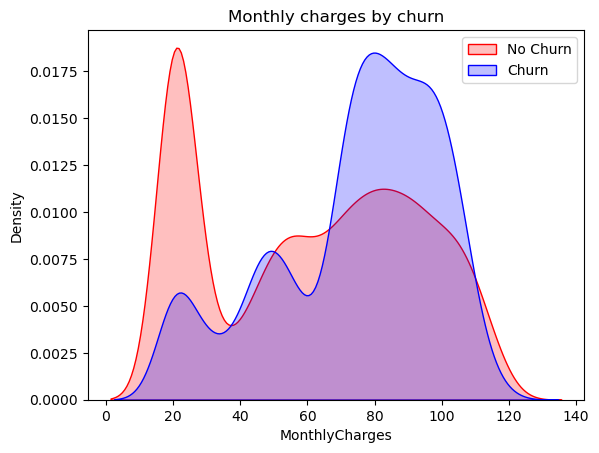

In [35]:
Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies["Churn"]==0)],
                  color="Red", fill = True)
Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies["Churn"]==1)],
                  ax=Mth, color="Blue", fill= True)
Mth.legend(["No Churn","Churn"], loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('MonthlyCharges')
Mth.set_title('Monthly charges by churn')

#### Insight - Churn is high when monthly charges are high

Text(0.5, 1.0, 'Tenure by churn')

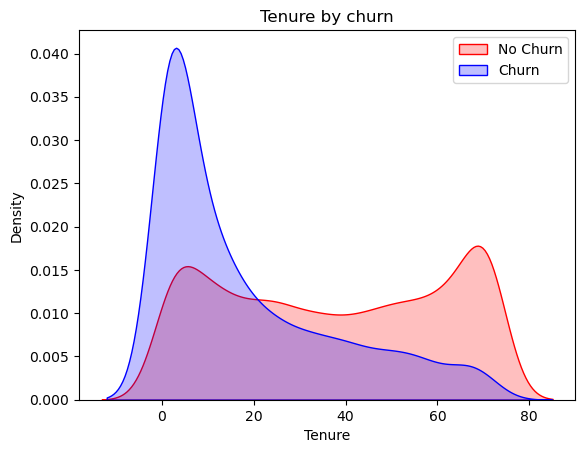

In [36]:
Ten = sns.kdeplot(df.tenure[(df["Churn"]=="No")],
                  color="Red", fill = True)
Ten = sns.kdeplot(df.tenure[(df["Churn"]=="Yes")],
                  ax=Ten, color="Blue", fill= True)
Ten.legend(["No Churn","Churn"], loc='upper right')
Ten.set_ylabel('Density')
Ten.set_xlabel('Tenure')
Ten.set_title('Tenure by churn')

##### Insight : People who are new are high churners while people with more tenure are low churners

Text(0.5, 1.0, 'Total charges by churn')

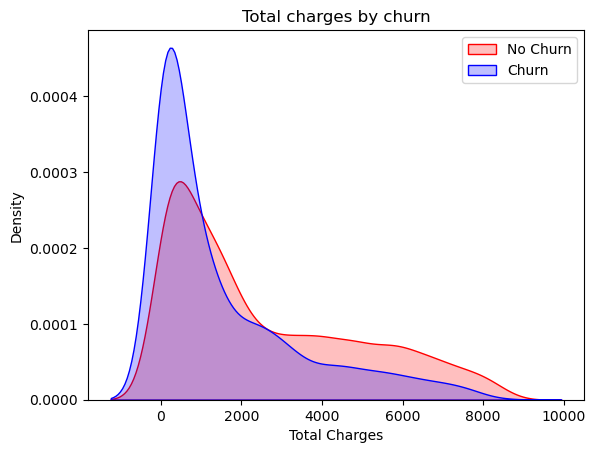

In [37]:
Tot = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies["Churn"]==0)],
                  color="Red", fill = True)
Tot = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies["Churn"]==1)],
                  ax=Tot, color="Blue", fill= True)
Tot.legend(["No Churn","Churn"], loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

##### Surprising insight
- Higher Churn at lower Total charges

However if we combine the insight of 3 parameter i.e., Tenure, Monthly charges & Total charges then the picture is bit clear : Higher Monthly charges at lower tenure results into lower Total charge. Hence, all these 3 factors viz Higher Monthly charge, Lower tenure and Lower total charge are linked to High Churn.

6. Built a correlation of all predictors with 'Churn'

<Axes: >

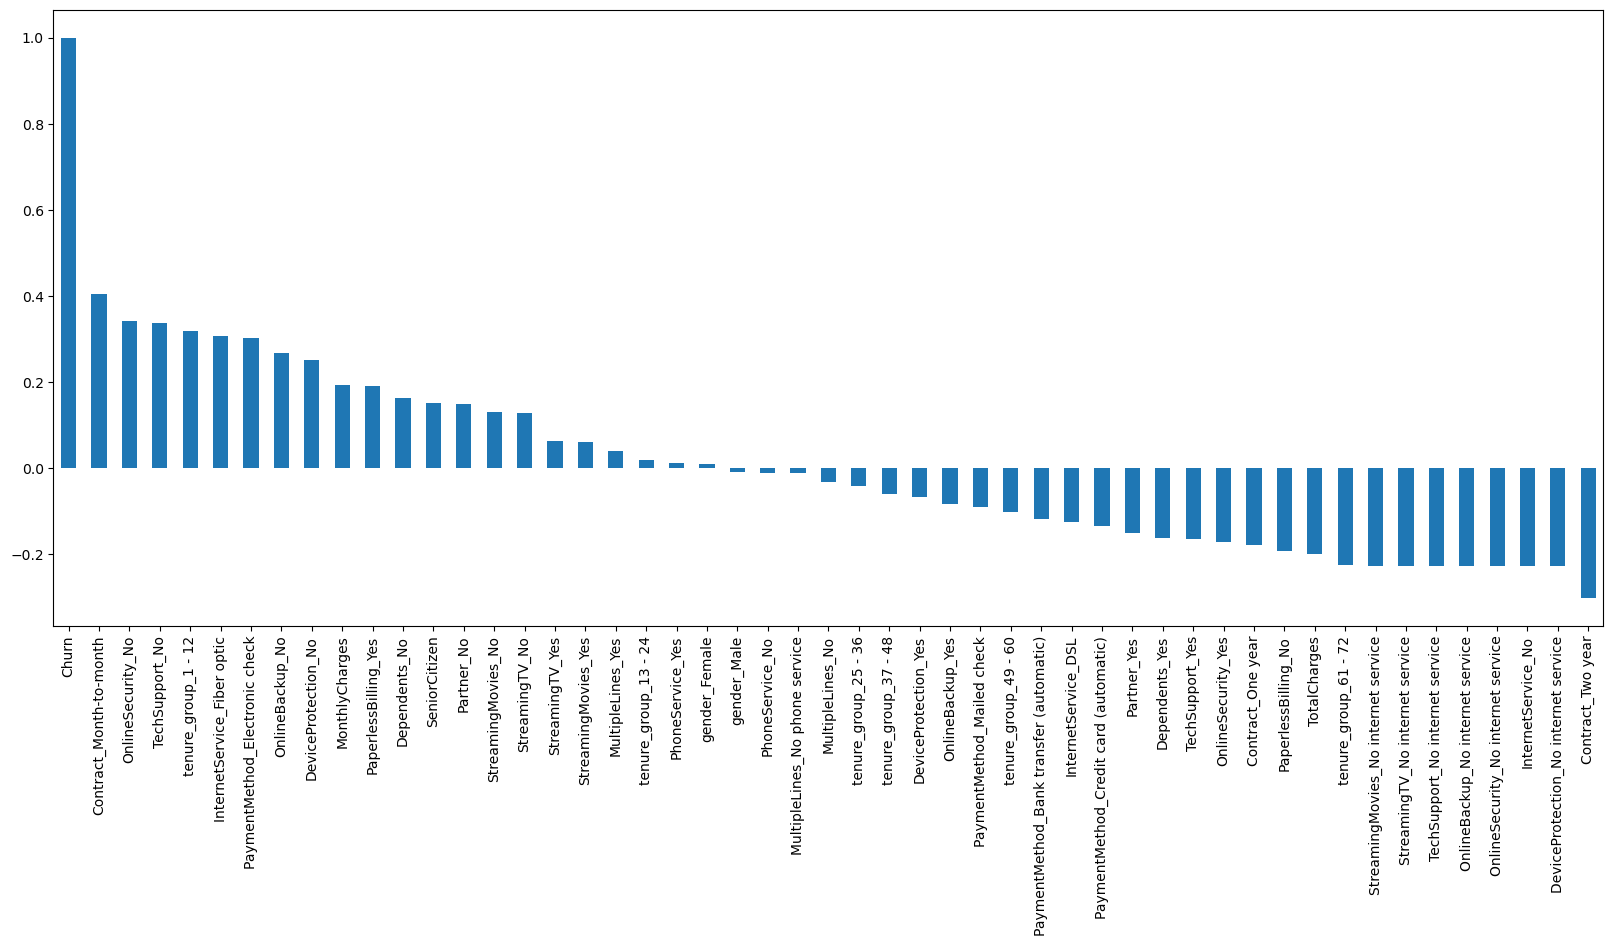

In [38]:
plt.figure(figsize=(20,8))
new_df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

*Derived Insight:*
- HIGH churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre optics Internet
- LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years
- Factors like Gender, Availability of PhoneService and # of multiple lines have almost NO impact on Churn
- This is also evident from the Heatmap below

<Axes: >

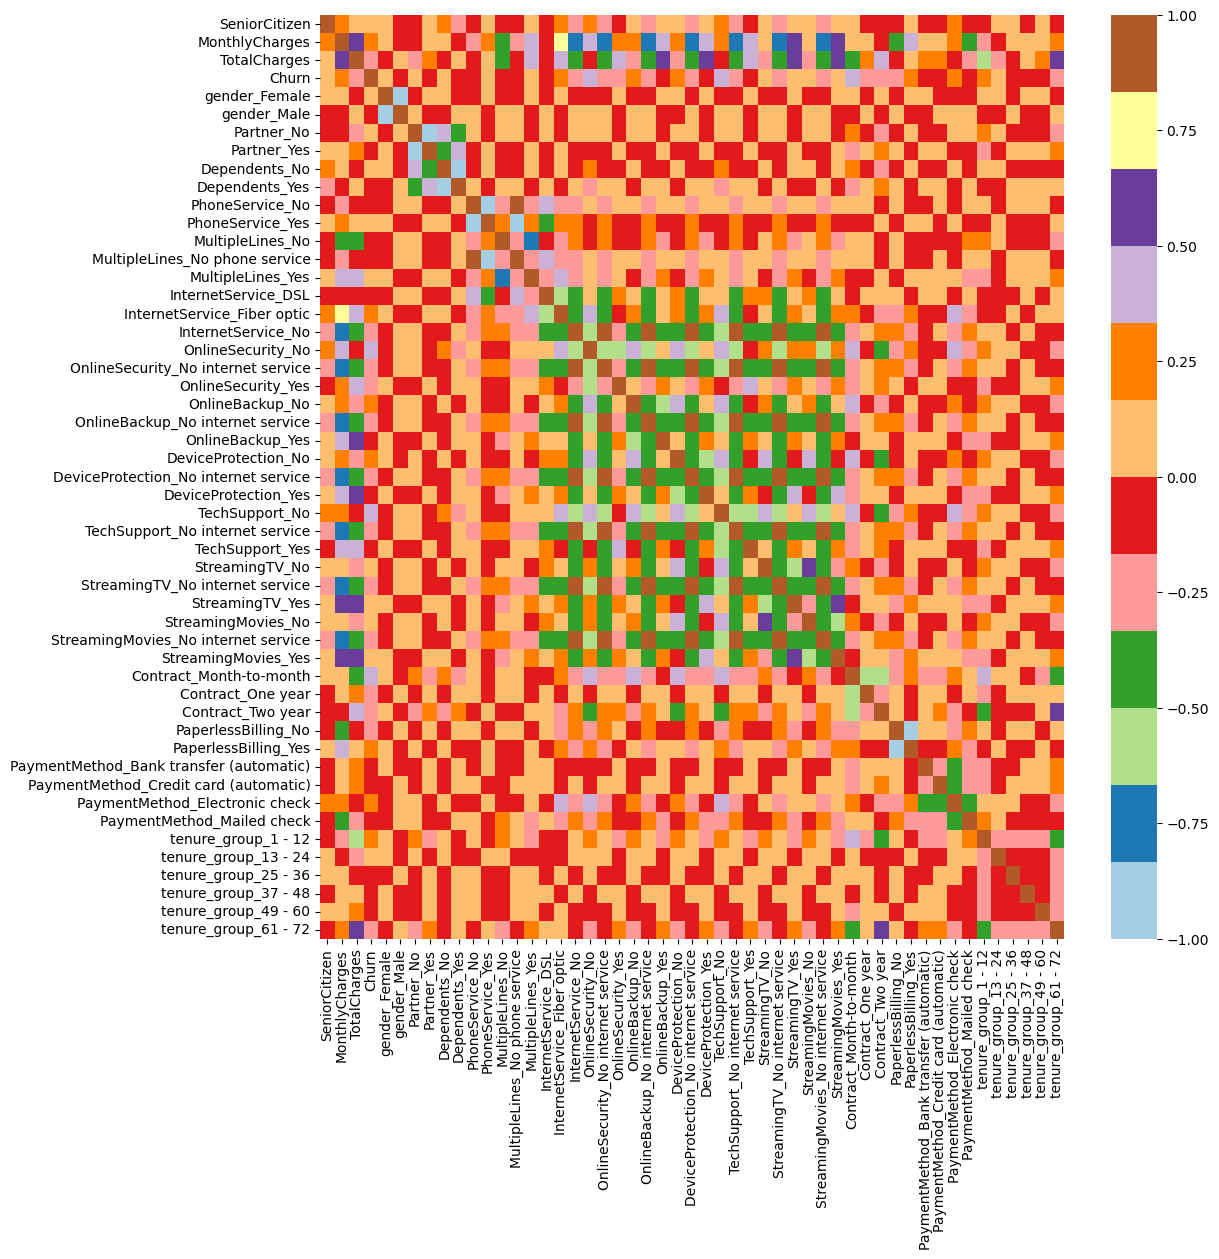

In [39]:
plt.figure(figsize=(12,12))
sns.heatmap(new_df_dummies.corr(), cmap="Paired")

## Bivariate Analysis

In [40]:
new_df1_target0= new_df.loc[new_df["Churn"]==0]
new_df1_target1= new_df.loc[new_df["Churn"]==1]

In [41]:
len(new_df1_target0)

5163

In [42]:
len(new_df1_target1)

1869

In [43]:
print(new_df1_target1[['Partner', 'gender']].dropna().head(10))
print(new_df1_target1['Partner'].unique())
print(new_df1_target1['gender'].unique())

   Partner  gender
2       No    Male
4       No  Female
5       No  Female
8      Yes  Female
13      No    Male
18     Yes  Female
20      No    Male
22      No    Male
26     Yes    Male
27     Yes    Male
['No' 'Yes']
['Male' 'Female']


In [44]:
def uniplot(df, col, title, hue=None):
    import seaborn as sns
    import matplotlib.pyplot as plt

    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30

    # Static width instead of dynamic buggy logic
    fig, ax = plt.subplots(figsize=(10, 6))

    plt.xticks(rotation=45)
    plt.title(title)

    sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue, palette='bright', ax=ax)

    plt.tight_layout()
    plt.show()


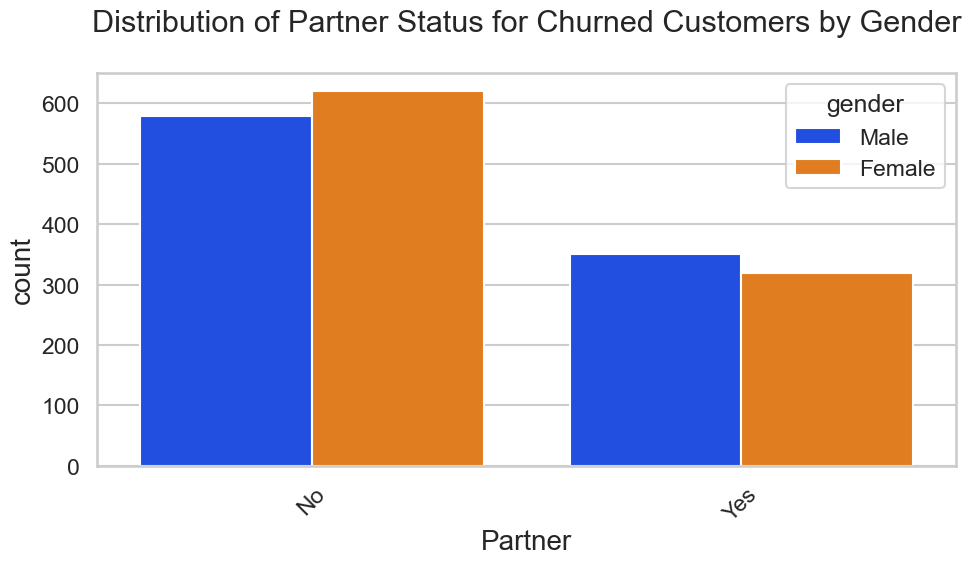

In [45]:
uniplot(new_df1_target1, col='Partner', title='Distribution of Partner Status for Churned Customers by Gender', hue='gender')


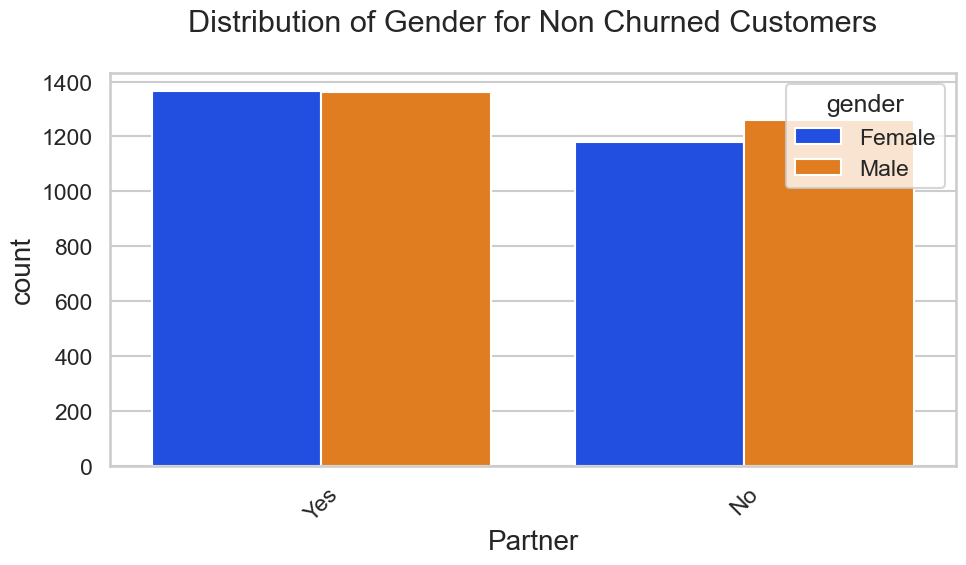

In [46]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

#### Insight : Female without any partners are more likely to churn than males

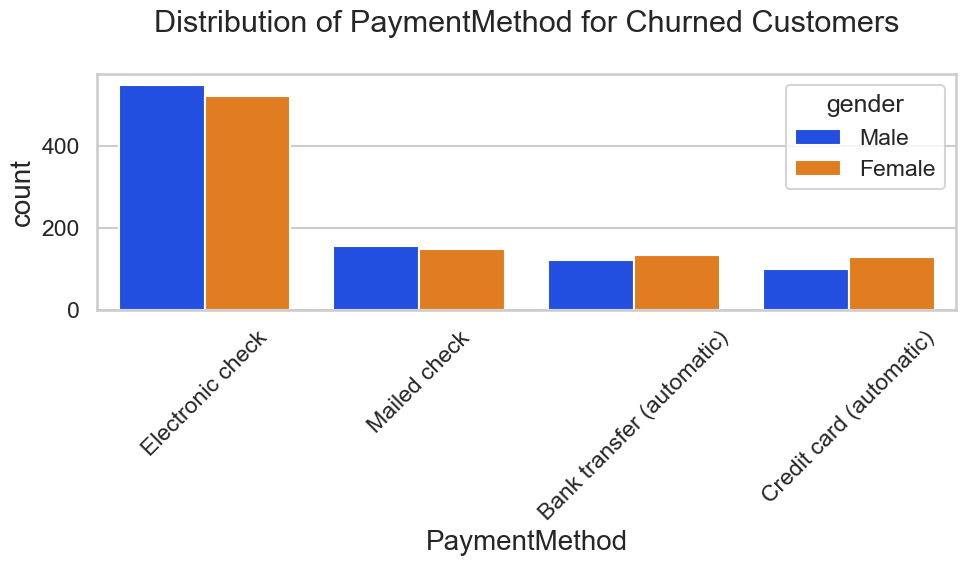

In [47]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

##### Female who are paying through credit card are more likely to churn

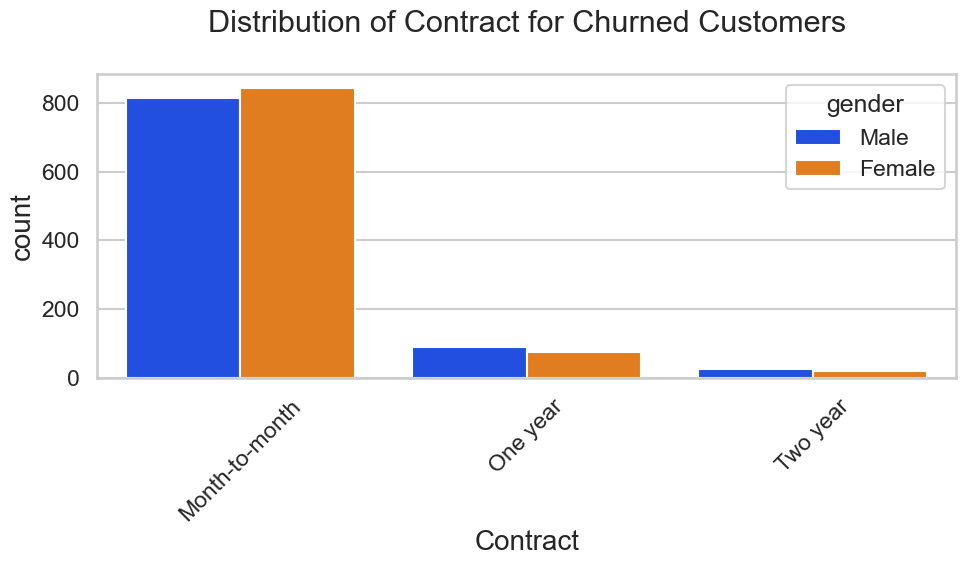

In [49]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

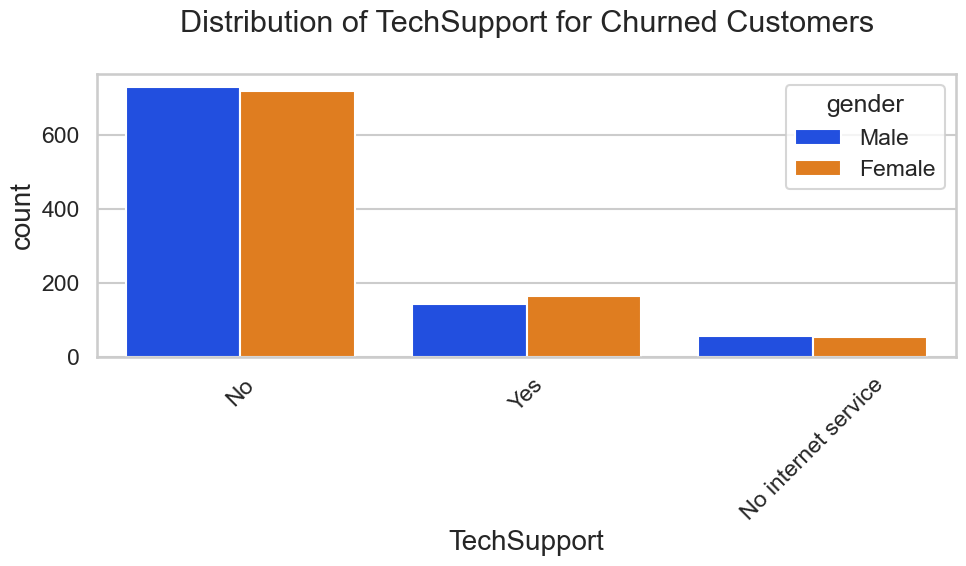

In [50]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

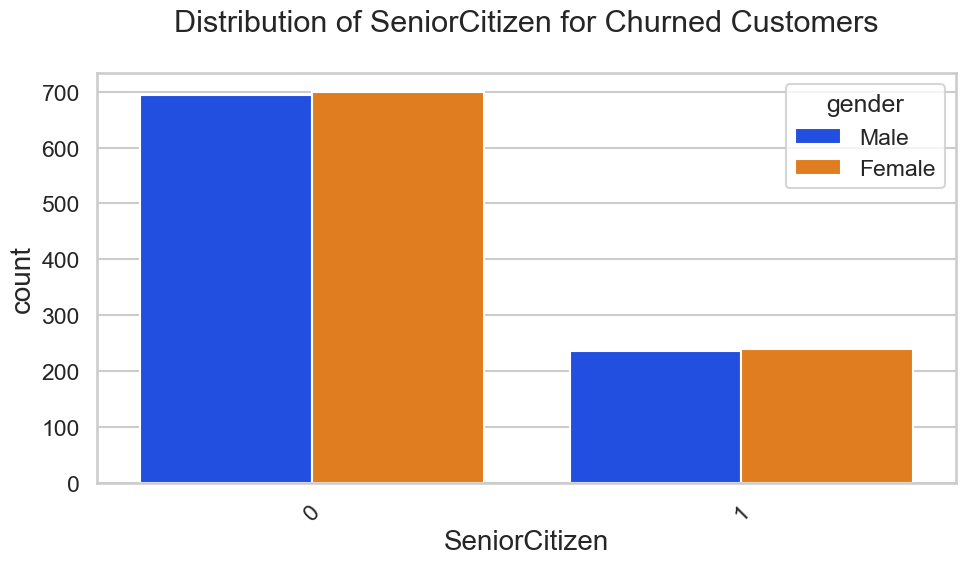

In [51]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

# CONCLUSION

The exploratory data analysis revealed several key factors that correlate with customer churn. Customers on month-to-month contracts, using electronic check payment methods, and without security or technical support services showed a significantly higher churn rate. Churn was also more prevalent among customers with shorter tenure, highlighting early dissatisfaction. Meanwhile, customers with long-term contracts, multiple services, and auto-pay options tended to remain loyal. These insights can help design targeted retention strategies and improve customer satisfaction.